## Разбираемся со Stable Diffusion

Для начала, установим библиотеки. Чтобы избежать переустановки torch в Google Colab, посмотрим на текущую версию, и укажем в `pip install` её же.

In [37]:
!pip freeze | grep torch

torch @ https://download.pytorch.org/whl/cu121/torch-2.2.1%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=1adf430f01ff649c848ac021785e18007b0714fdde68e4e65bd0c640bf3fb8e1
torchaudio @ https://download.pytorch.org/whl/cu121/torchaudio-2.2.1%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=23f6236429e2bf676b820e8e7221a1d58aaf908bff2ba2665aa852df71a97961
torchdata==0.7.1
torchsummary==1.5.1
torchtext==0.17.1
torchvision @ https://download.pytorch.org/whl/cu121/torchvision-0.17.1%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=27af47915f6e762c1d44e58e8088d22ac97445668f9f793524032b2baf4f34bd


In [3]:
!pip install torch==2.2.1+cu121 diffusers transformers scipy ftfy accelerate xformers "ipywidgets>=7,<8" triton
#==2.0.0.dev20221120

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 MB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_6

Загружаем модель Stable Diffusion:

In [1]:
import torch
from diffusers import StableDiffusionPipeline

#model_name = "CompVis/stable-diffusion-v1-4"
#model_name = "stabilityai/stable-diffusion-2-1"
model_name = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_name, revision="fp16", torch_dtype=torch.float16, use_auth_token=True, safety_checker=None)
pipe.enable_xformers_memory_efficient_attention()
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-v1-5 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found
Keyword arguments {'use_auth_token'

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Посмотрим на устройство модели:

In [5]:
pipe

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Определяем несколько вспомогательных функций:

In [2]:
import matplotlib.pyplot as plt

def display_images(l):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()


Сгенерируем картинки:

  0%|          | 0/25 [00:00<?, ?it/s]

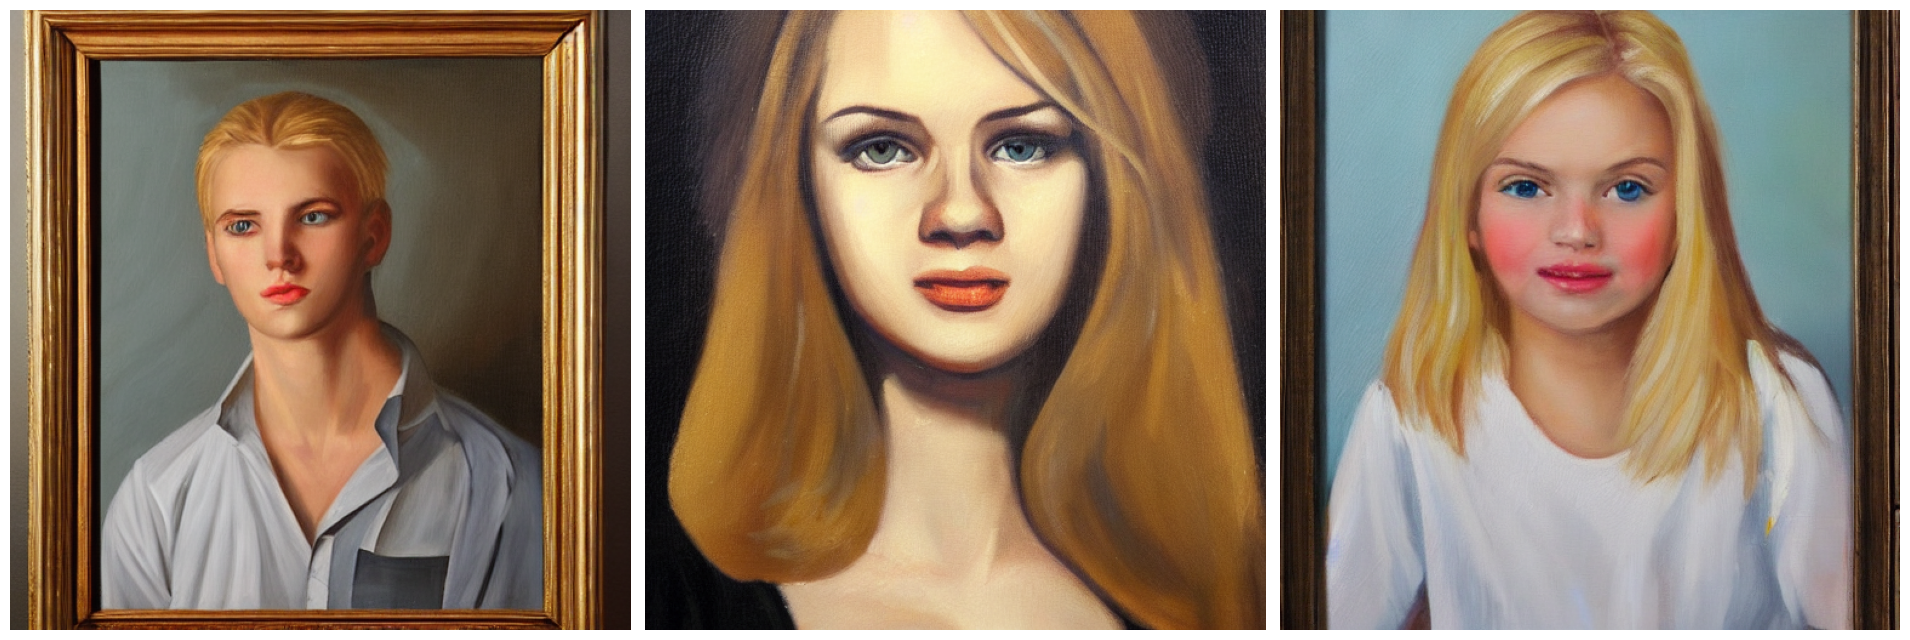

In [3]:
params = {
    "width" : 512,
    "height" : 512,
    "num_inference_steps" : 25
}

prompts = [f"oil portrait painting of a beautiful blond young {x}, looking with interest into the camera" for x in ["man","woman","girl"]]
res = pipe(prompts,**params).images
display_images(res)

Посмотрим на кодировщик VAE:

In [4]:
import numpy as np
import PIL

def preprocess(image):
    if isinstance(image, torch.Tensor):
        return image
    elif isinstance(image, PIL.Image.Image):
        image = [image]

    if isinstance(image[0], PIL.Image.Image):
        w, h = image[0].size
        w, h = map(lambda x: x - x % 8, (w, h))  # resize to integer multiple of 8

        image = [np.array(i.resize((w, h), PIL.Image.LANCZOS))[None, :] for i in image]
        image = np.concatenate(image, axis=0)
        image = np.array(image).astype(np.float32) / 255.0
        image = image.transpose(0, 3, 1, 2)
        image = 2.0 * image - 1.0
        image = torch.from_numpy(image).half()
    elif isinstance(image[0], torch.Tensor):
        image = torch.cat(image, dim=0)
    return image


lat = pipe.vae.encode(preprocess(res[0:2]).to("cuda"))
lat

AutoencoderKLOutput(latent_dist=<diffusers.models.autoencoders.vae.DiagonalGaussianDistribution object at 0x7f7b2cbc0dc0>)

In [5]:
latent = lat.latent_dist.sample()
lat = None
latent.size()

torch.Size([2, 4, 64, 64])

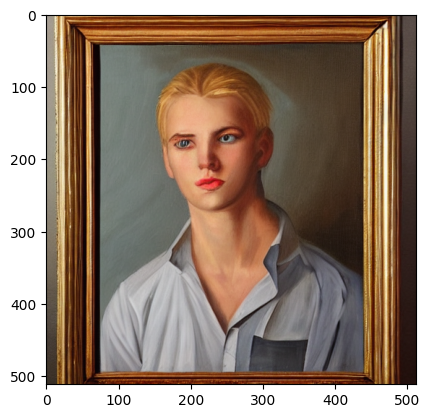

In [6]:
r1 = pipe.vae.decode(latent[0:1]).sample
i = r1[0].cpu().detach().numpy().astype(np.float32).transpose(1,2,0)
plt.imshow((i+1)/2.0)

Подумаем, как создать промежуточное изображение между двумя запросами. Есть варианты:
* Интерполяция латентного представления
* Интерполяция векторного представления текста

Первый вариант не даёт хороших результатов.

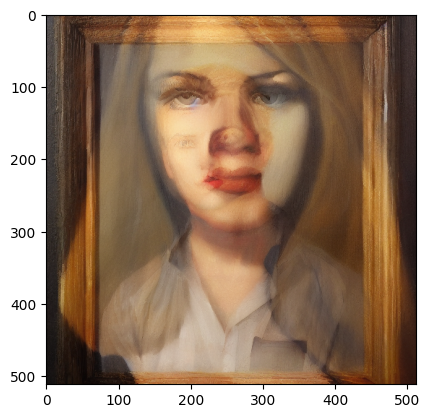

In [7]:
r1 = pipe.vae.decode(latent[0:2].mean(axis=0)[None,:]).sample
i = r1[0].cpu().detach().numpy().astype(np.float32).transpose(1,2,0)
plt.imshow((i+1)/2.0)

Для получения векторного представления текста используем такую функцию (заимствована из `diffusers`):

In [8]:
def get_prompt_embeds(prompt):
  device = pipe.text_encoder.device
  text_inputs = pipe.tokenizer(
    prompt, padding="max_length",
    max_length=pipe.tokenizer.model_max_length,
    truncation=True,
    return_tensors="pt")

  text_input_ids = text_inputs.input_ids
  untruncated_ids = pipe.tokenizer(prompt, padding="longest", return_tensors="pt").input_ids

  if untruncated_ids.shape[-1] >= text_input_ids.shape[-1] and not torch.equal(
      text_input_ids, untruncated_ids):
    removed_text = pipe.tokenizer.batch_decode(
        untruncated_ids[:, pipe.tokenizer.model_max_length - 1 : -1])
    print(
        "The following part of your input was truncated because CLIP can only handle sequences up to"
        f" {pipe.tokenizer.model_max_length} tokens: {removed_text}"
    )

  if hasattr(pipe.text_encoder.config, "use_attention_mask") and pipe.text_encoder.config.use_attention_mask:
      attention_mask = text_inputs.attention_mask.to(pipe.device)
  else:
      attention_mask = None

  prompt_embeds = pipe.text_encoder(
      text_input_ids.to(device),
      attention_mask=attention_mask,
  )
  prompt_embeds = prompt_embeds[0]
  return prompt_embeds

Посчитаем текстовые эмбеддинги всех промптов:

In [9]:
embeds = torch.stack([get_prompt_embeds(x)[0] for x in prompts])
embeds.shape

torch.Size([3, 77, 768])

Теперь сгенерируем картинки:

<ipython-input-10-f315c0a9af7c>:1: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  shape = (1, pipe.unet.in_channels, params['height'] // pipe.vae_scale_factor, params['width'] // pipe.vae_scale_factor)


  0%|          | 0/25 [00:00<?, ?it/s]

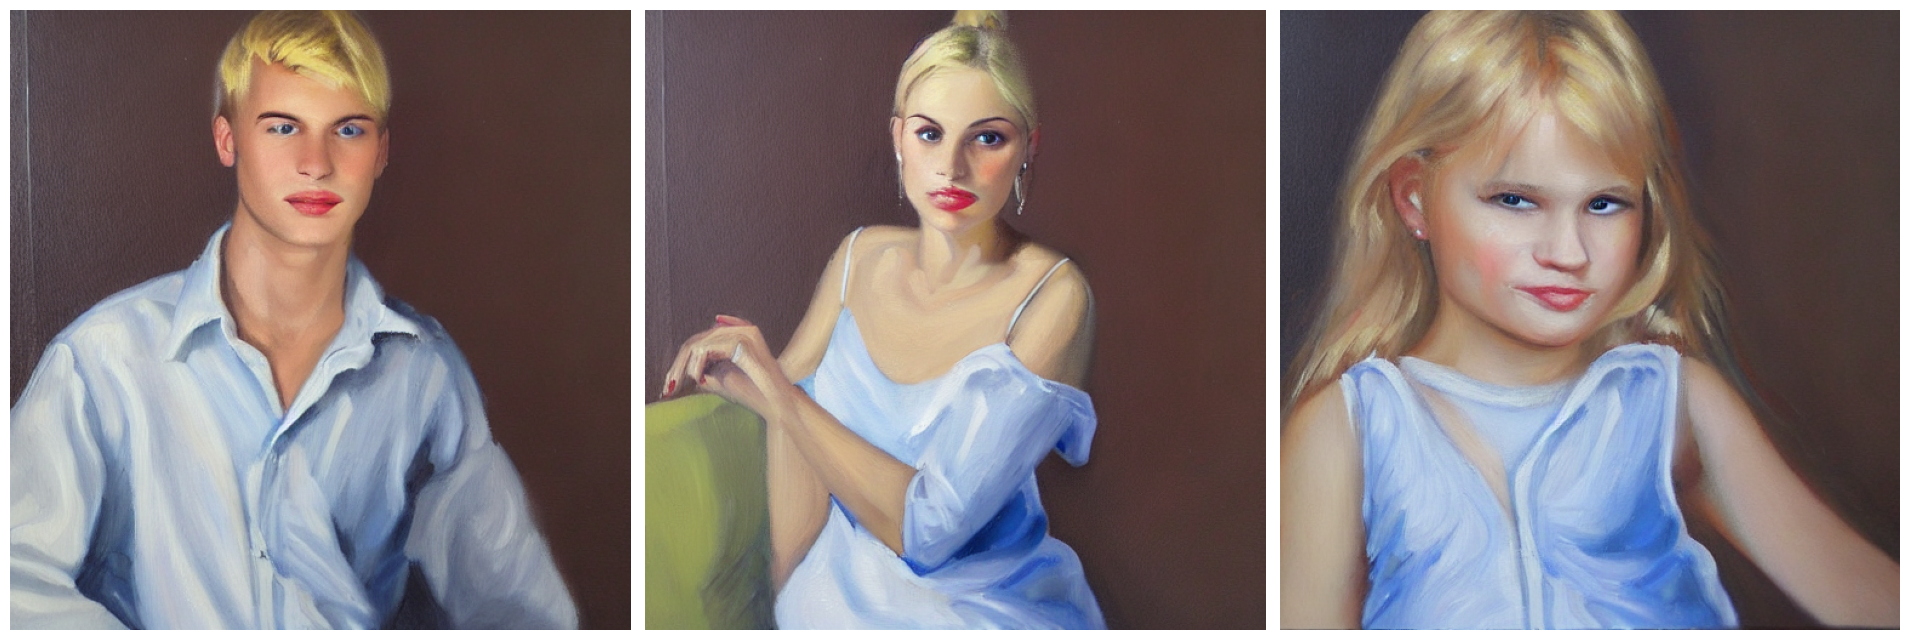

In [10]:
shape = (1, pipe.unet.in_channels, params['height'] // pipe.vae_scale_factor, params['width'] // pipe.vae_scale_factor)
latents = torch.randn(shape,dtype=pipe.unet.dtype)
lats = torch.stack([latents[0]]*len(prompts))
r = pipe(prompt_embeds=embeds,latents=lats,**params).images
display_images(r)

In [15]:
membeds = torch.stack([(5*embeds[0]+embeds[1])/6, (2*embeds[0]+embeds[2])/3, (embeds[1]+embeds[2])/2 ])
membeds.shape

torch.Size([3, 77, 768])

  0%|          | 0/25 [00:00<?, ?it/s]

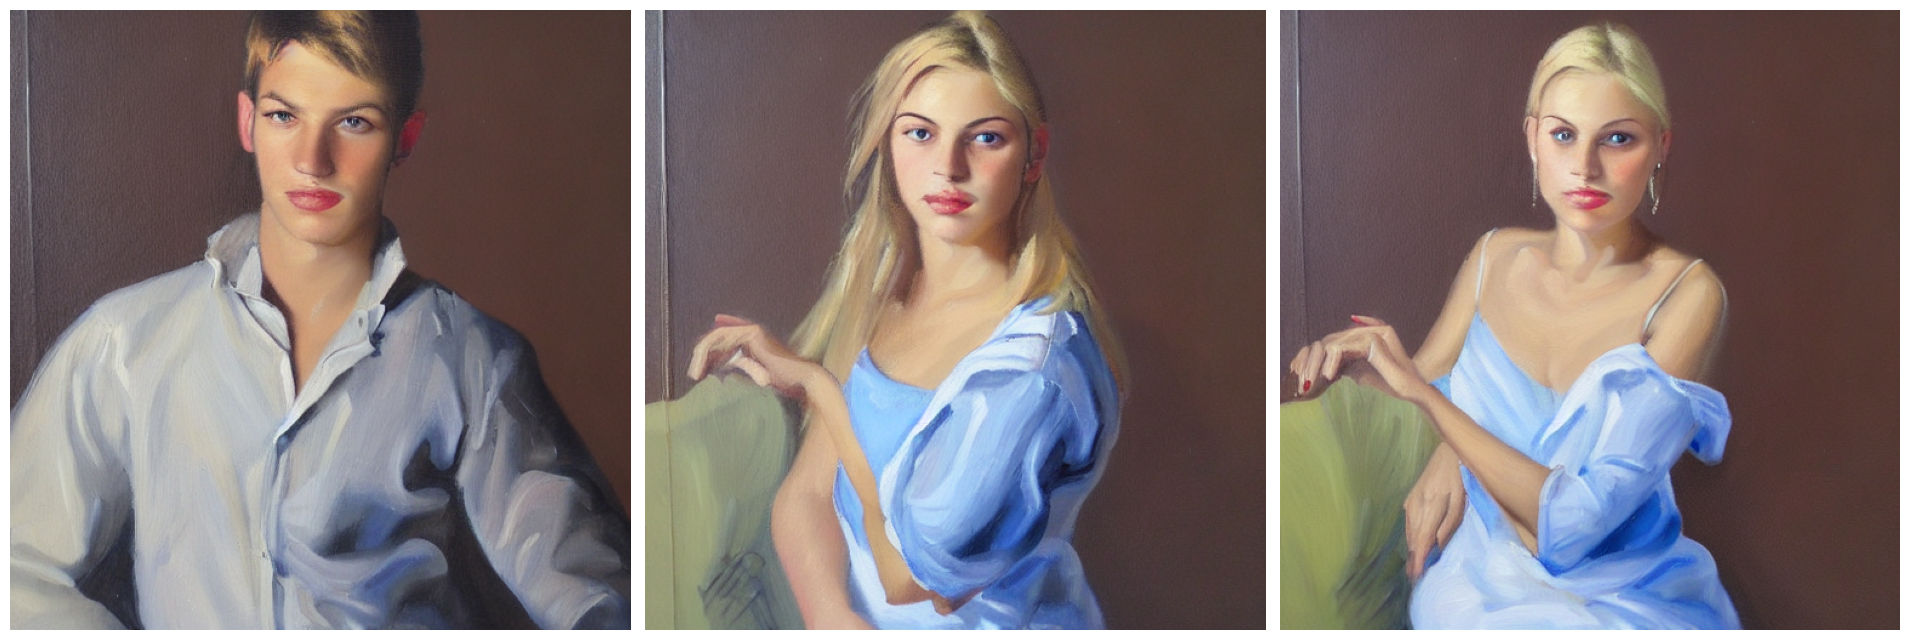

In [16]:
r = pipe(prompt_embeds=membeds,latents=lats,**params).images
display_images(r)

Для генерации видео мы задаём начальный и конечный запрос, а также количество кадров и параметры генерации:


In [ ]:
start = "Oil painting of a nice happy couple waliking hand in hand by the sea shore on a sunny day"
finish = "Oil painting of a nice sad couple walking hand in hand under pouring rain in the big city in autumn"

In [ ]:
vstart = get_prompt_embeds(start)
vfinish = get_prompt_embeds(finish)

In [ ]:
shape = (1, pipe.unet.in_channels, params['height'] // pipe.vae_scale_factor, params['width'] // pipe.vae_scale_factor)
latents = torch.randn(shape,dtype=pipe.unet.dtype)

<ipython-input-9-7fbfd576a7bd>:1: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  shape = (1, pipe.unet.in_channels, params['height'] // pipe.vae_scale_factor, params['width'] // pipe.vae_scale_factor)


Следующая ячейка непосредственно генерирует все изображения. Это может занять длительное время, в зависимости от количества кадров.

In [ ]:
frames = 30
batch_size = 3
vec = (vfinish[0]-vstart[0])/frames
encs = torch.stack([ vstart[0]+vec*i for i in range(frames)])
lats = torch.stack([latents[0]]*batch_size)
res = []
for b in torch.split(encs,batch_size):
  r = pipe(prompt_embeds=b,latents=lats,**params).images
  res.extend(r)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

Записываем отдельные кадры на диск:

In [ ]:
!rm frame*.jpg
for i,im in enumerate(res):
  im.save(f'frame_{i:03d}.jpg')

И собираем все кадры вместе с помощью `ffmpeg`:

In [ ]:
!rm *.mp4
!ffmpeg -r 15 -i frame_%03d.jpg -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4

rm: cannot remove '*.mp4': No such file or directory
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable

### Генерация более длинного видео

Для этого мы описываем последовательность фраз, и генерируем подряд последовательность переходов между ними.

In [ ]:
prompts = """
Oil painting of a nice young happy couple waliking hand in hand by the sea shore on a sunny day, with ships in the distance
Oil painting of a young couple sleeping by the sea shore on a dark starry night, with glowing ships in the distance
Oil painting of a nice sad couple walking hand in hand under pouring rain in the big city in autumn on a rainy day
Oil painting of a couple sleeping in their bed at night, with lights from street lamps coming through the window
Oil painting of a nice old couple walking hand in hand in the snow in the rural village on a sunny day
Oil painting of an old couple sitting in front of the TV in the evening, nice rural interiour
Oil painting of an old couple going to bed at night in the rural village house
Oil painting of a starry night with full moon, scary atmosphere
"""

frames = 30 # per episode
params = {
    "width" : 512,
    "height" : 512,
    "num_inference_steps" : 30
}


In [ ]:
prompts = [x for x in prompts.split('\n') if len(x)>1]
vecs = [get_prompt_embeds(x)[0] for x in prompts]

In [ ]:
res = []
for v1,v2 in zip(vecs[:-1],vecs[1:]):
  print(f"NEW Episode")
  vec = (v2-v1)/frames
  encs = torch.stack([ v1+vec*i for i in range(frames)])
  lats = torch.stack([latents[0]]*batch_size)
  for b in torch.split(encs,batch_size):
    r = pipe(prompt_embeds=b,latents=lats,**params).images
    res.extend(r)

NEW Episode


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

NEW Episode


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

NEW Episode


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

NEW Episode


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

NEW Episode


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

NEW Episode


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

NEW Episode


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
!rm frame*.jpg
for i,im in enumerate(res):
  im.save(f'frame_{i:03d}.jpg')

In [ ]:
!rm *.mp4
!ffmpeg -r 6 -i frame_%03d.jpg -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e